In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df =pd.read_csv("u.data")

In [5]:
df.head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [7]:
column_names =["user_id", "item_id", "rating","timestamp"]

In [9]:
df =pd.read_csv("u.data", names=column_names, sep="\t")

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [13]:
movie_titles=pd.read_csv("Movie_Id_Titles")

In [15]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
df =pd.merge(df, movie_titles, on="item_id")

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [45]:
df.groupby("title")["rating"].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [47]:
df.groupby("title")["rating"].count().sort_values(ascending=False)

title
Star Wars (1977)                      584
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [53]:
ratings =pd.DataFrame(df.groupby("title")["rating"].mean())

In [55]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [65]:
ratings["Numb of Ratings"]= pd.DataFrame(df.groupby("title")["rating"].count())

In [67]:
ratings.head()

,rating,Numb of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

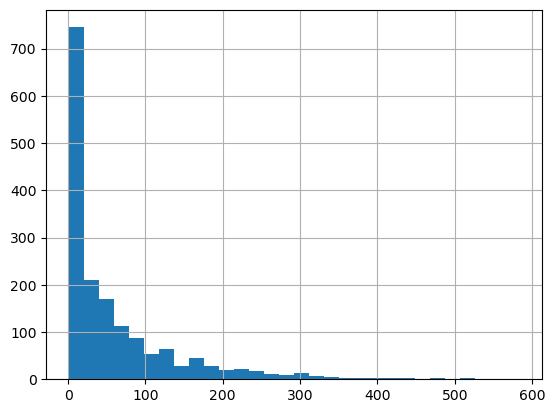

In [69]:
ratings["Numb of Ratings"].hist(bins=30)

<Axes: >

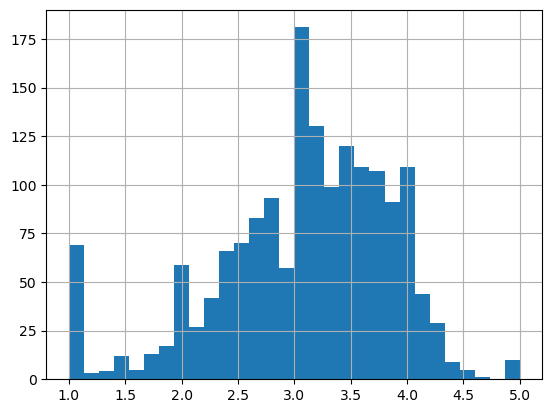

In [71]:
ratings["rating"].hist(bins=30)

In [73]:
movie =df.pivot_table(index="user_id", columns="title", values="rating")

In [75]:
movie.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
ratings.sort_values("Numb of Ratings", ascending=False)

,rating,Numb of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [87]:
contact =movie["Contact (1997)"]

In [89]:
contact.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [91]:
contact.dropna(inplace =True)

In [93]:
contact.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
6    2.0
Name: Contact (1997), dtype: float64

In [101]:
similar_to_contact =movie.corrwith(contact)

C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:

In [103]:
similar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [105]:
corr_contact =pd.DataFrame(similar_to_contact, columns=["Correlation"])

In [107]:
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [109]:
corr_contact.dropna(inplace=True)

In [113]:
corr_contact.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
Gold Diggers: The Secret of Bear Mountain (1995),1.0
For Ever Mozart (1996),1.0
Faust (1994),1.0
Fausto (1993),1.0


In [131]:
corr_contact =corr_contact.join(ratings["Numb of Ratings"])

In [133]:
corr_contact.head()

,Correlation,Numb of Ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [115]:
starwar=movie["Star Wars (1977)"]

In [117]:
starwar.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [119]:
starwar.dropna(inplace =True)

In [121]:
similar_to_starwars= movie.corrwith(starwar)

C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:

In [123]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [135]:
corr_starwars=pd.DataFrame(similar_to_starwars, columns=["Correlation"])

In [137]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [139]:
corr_starwars.isnull()

,Correlation
title,
'Til There Was You (1997),False
1-900 (1994),False
101 Dalmatians (1996),False
12 Angry Men (1957),False
187 (1997),False
...,...
Young Guns II (1990),False
"Young Poisoner's Handbook, The (1995)",False
Zeus and Roxanne (1997),False


In [141]:
corr_starwars.dropna()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [143]:
corr_starwars =corr_starwars.join(ratings["Numb of Ratings"])

In [145]:
corr_starwars.head()

,Correlation,Numb of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [151]:
corr_starwars[corr_starwars["Numb of Ratings"]>100].sort_values("Correlation" ,ascending =False)

,Correlation,Numb of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128
